In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mysql.connector

Verbindung zur Datenbank / Подключение к базе данных

In [2]:
mydb = mysql.connector.connect(
    host = "mysqle8c2.netcup.net",
    user = "k207746_python_brunoyam",
    passwd  = "python2023%",
    db = "k207746_python_brunoyam",
)

print(mydb)

In [3]:
cursor = mydb.cursor()

Aufzeigen der vorhandenen Tabellen / Показ существующих таблиц

In [4]:
cursor.execute("SHOW TABLES")
print(cursor)

CMySQLCursor: SHOW TABLES


In [5]:
for x in cursor:
    print(x)

('courses',)
('courses_students',)
('locations',)
('messages',)
('students',)
('teachers',)


Anzahl der Kurse / Количество курсов

In [6]:
cursor.execute("SELECT count(*) FROM courses")

In [7]:
for x in cursor:
    print(x)

(52,)


Auflisten der Kurse mit dem Titel Algorithmen /  Список курсов под названием «Алгоритмы»

In [8]:
cursor.execute( "SELECT * FROM courses WHERE title = 'Algorithmen'" )
print(cursor)

CMySQLCursor: SELECT * FROM courses WHERE title = 'Alg..


In [9]:
for x in cursor:
    print(x)

(1, datetime.datetime(2016, 12, 8, 21, 4, 21), datetime.datetime(2016, 12, 8, 21, 4, 21), 'Algorithmen', 1, datetime.datetime(2017, 2, 28, 21, 4, 21), datetime.datetime(2017, 2, 28, 21, 4, 21), 3)


Aufschlüsseln der Vornamen wie oft die vorkommen in absteigender Reihnfolge / Разбивка имен и частота их появления в порядке убывания.

In [10]:
cursor.execute(" SELECT firstname, COUNT(*) AS c FROM students GROUP BY firstname ORDER BY c DESC, firstname ASC LIMIT 10")
print(cursor)
for x in  cursor:
    print(x)
    

CMySQLCursor:  SELECT firstname, COUNT(*) AS c FROM st..
('Caroline', 5)
('Dietmar', 5)
('Kristina', 5)
('Ralf', 5)
('Alwin', 4)
('Andrzej', 4)
('Anita', 4)
('Dierk', 4)
('Elli', 4)
('Helena', 4)


Verbinden der Tabellen Kurse und Studierende / Соединение таблиц курсов и студентов

In [11]:
cursor.execute( "SELECT firstname, lastname, courses.title FROM students LEFT JOIN courses_students ON students.id = courses_students.student_id LEFT JOIN courses ON courses_students.course_id = courses.id ORDER BY firstname LIMIT 10" )
print(cursor)

CMySQLCursor: SELECT firstname, lastname, courses.titl..


In [12]:
for x in cursor:
    print(x)

('Achim', 'Wilke', 'Diskrete Wahrscheinlichkeitstheorie')
('Achim', 'Wilke', 'Interview-Training')
('Achim', 'Wilke', 'Datenstrukturen')
('Achim', 'Wilke', 'PHP')
('Achim', 'Naumann', 'Datenstrukturen')
('Adalbert', 'Paul', 'Datenbankoptimierung')
('Adalbert', 'Paul', 'Datenstrukturen')
('Adalbert', 'Paul', 'Physikalische Simulationen')
('Adalbert', 'Paul', 'Webservices')
('Adalbert', 'Stock', None)


Durschnittsalter der Studierenden / Средний возраст студентов

In [13]:
cursor.execute("SELECT AVG (age) FROM students")
print(cursor)

CMySQLCursor: SELECT AVG (age) FROM students


In [14]:
for x in cursor:
    print(x)

(Decimal('21.5100'),)


Wie viele Studierende gibt es die 20 Jahre alt sind? / Сколько студентов в возрасте 20 лет?

In [15]:
cursor.execute("SELECT COUNT(*) FROM students WHERE age = 20")
print(cursor)

CMySQLCursor: SELECT COUNT(*) FROM students WHERE age ..


In [16]:
for x in cursor:
    print(x)

(128,)


Wie alt ist der jüngste studierende? Сколько лет самому младшему студент?

In [17]:
cursor.execute("SELECT MIN(age) FROM students")
print(cursor)

CMySQLCursor: SELECT MIN(age) FROM students


In [18]:
for x in cursor:
    print(x)
   

(19,)


Auflisten der studierenden mir dem Vornamen und Alter wo keine Nullwerte vorkommen. / Перечислите учащихся, указав их имена и возраст, где нет нулевых значений.

In [19]:
cursor.execute("SELECT firstname, age FROM students WHERE age IS NOT NULL LIMIT 7")
result = cursor.fetchall



Name of Students =  ['Renate', 'Helena', 'Karoline', 'Franz Josef', 'Tim', 'Sonja', 'Fridolin']
Age of Students =  [23, 24, 19, 24, 22, 23, 21]


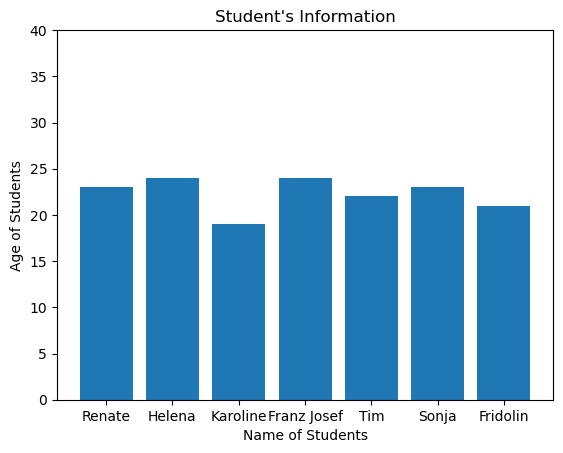

In [20]:
firstname = []
age=[]

for x in cursor:
    firstname.append(x[0])
    age.append(x[1])
     
print("Name of Students = ", firstname)
print("Age of Students = ", age)
  
 
# Визуализация данных с использованием Matplotlib
plt.bar(firstname, age)
plt.ylim(0, 40)
plt.xlabel("Name of Students")
plt.ylabel("Age of Students")
plt.title("Student's Information")
plt.show()

In [21]:
cursor.close()

True